In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import thinkstats2
import thinkplot
import scipy.stats as ss
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, log_loss, confusion_matrix, precision_score, recall_score
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as sm
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import binarize
import math
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SVMSMOTE
from imblearn.over_sampling import ADASYN
from collections import Counter
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import mean_squared_error

## Are smokers charged higher premiums compared to non-smokers?

In [2]:
df = pd.read_csv("insurance.csv")
df.dropna()
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


We loaded the data and got ride of the null values. Next we drew a pairplot and color-coded the smokers and non-smokers. We can see that the data is semi normal. There is a bigger population of non-smokers compared to the smoker. Regardless of age, bmi and number of children the smokers are charged higher compared to the non-smokers. But, in the 15K to 35K charge group there seems to be an overlap that is not explained by smoking. 

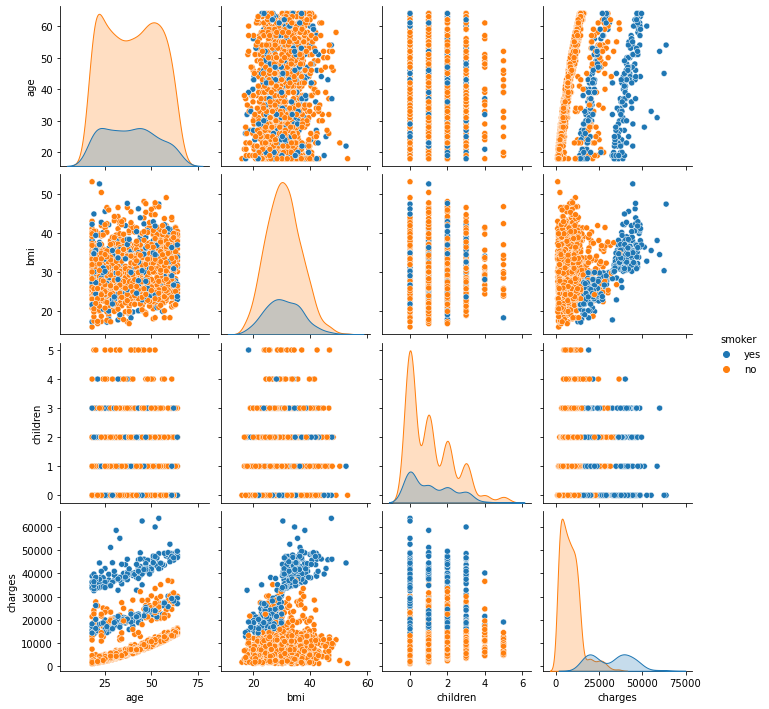

In [3]:
sns.pairplot(df, hue = 'smoker')

The charges when split by smoker chategory are not normally distributed. To evaluate whether these two groups are different we ran a Mann-Whittney test that resulted in a very small p-value. we can conclude that these 2 groups are different based on the P-value 


<AxesSubplot:xlabel='smoker', ylabel='charges'>

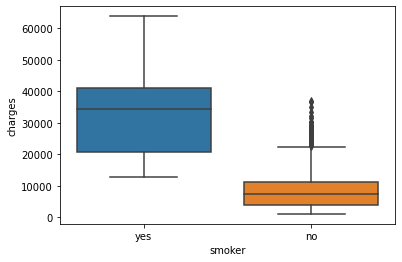

In [4]:
sns.boxplot(x="smoker", y="charges", data=df)

In [23]:
smoker = df["charges"][df['smoker']=="yes"]
non_smoker = df["charges"][df['smoker']=="no"]

ss.mannwhitneyu(smoker, non_smoker)

MannwhitneyuResult(statistic=284133.0, pvalue=5.270233444503571e-130)

Then we looked at the difference between how much smokers were getting charged in different regions and we can see a clear distinction between the north and south which can explain the 2 peaks that are displayed in the graph

In [37]:
smokers=df[df["smoker"]=="yes"]

<AxesSubplot:xlabel='region', ylabel='charges'>

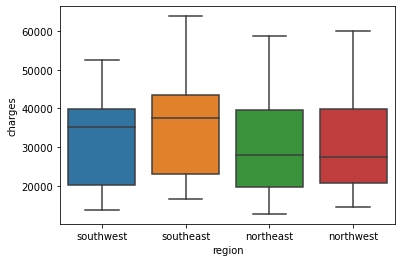

In [40]:
sns.boxplot(x="region", y="charges", data=smokers)

We also looked at the difference in how much insurance premiums cost in each region and based on our p-value we can conclude that there's a significance difference between the regions. That might explain the overlap between the smokers and non-smokers in the 15K-35K charge range

<AxesSubplot:xlabel='region', ylabel='charges'>

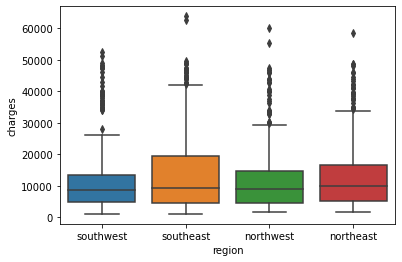

In [39]:
sns.boxplot(x="region", y="charges", data=df)

<AxesSubplot:xlabel='region', ylabel='count'>

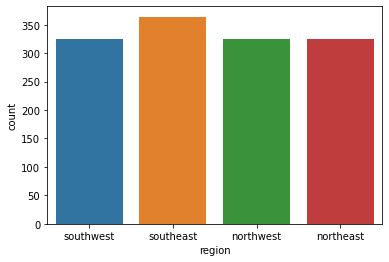

In [6]:
sns.countplot(x="region", data=df)

In [24]:
varStat, varP = ss.levene(df['charges'][df['region'] == "southwest"],
               df['charges'][df['region'] == "northwest"],
               df['charges'][df['region'] == "southeast"],
               df['charges'][df['region'] == "northeast"])
varP

0.0008610590250786703

In [25]:
ss.f_oneway(df['charges'][df['region'] == "southwest"],
               df['charges'][df['region'] == "northwest"],
               df['charges'][df['region'] == "southeast"],
               df['charges'][df['region'] == "northeast"])

F_onewayResult(statistic=2.9696266935891193, pvalue=0.0308933560705201)

Then we looked at the difference between the charges based on gender and based on our P-value we concluded that the difference between the two groups is non-significant and random. 

<AxesSubplot:xlabel='sex', ylabel='charges'>

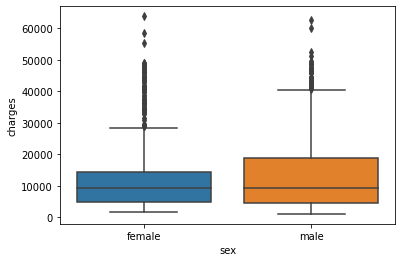

In [7]:
sns.boxplot(x="sex", y="charges", data=df)

In [29]:
df[df['sex']=='male'].median()

C:\Users\taraz\AppData\Local\Temp\ipykernel_8416\48431488.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df[df['sex']=='male'].median()


age           39.00000
bmi           30.68750
children       1.00000
charges     9369.61575
dtype: float64

In [30]:
df[df['sex']=='female'].median()

C:\Users\taraz\AppData\Local\Temp\ipykernel_8416\2454573153.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df[df['sex']=='female'].median()


age           40.0000
bmi           30.1075
children       1.0000
charges     9412.9625
dtype: float64

In [31]:
observed = [9369,9412]
ss.chisquare(observed)

Power_divergenceResult(statistic=0.09845056173792663, pvalue=0.7536970033554777)

#sns.boxplot(x="region_northwest", y="charges", data=temp,ax=ax[0,1])
#sns.boxplot(x="region_southeast", y="charges", data=temp,ax=ax[1,0])
#sns.boxplot(x="region_southwest", y="charges", data=temp,ax=ax[1,1])

We examined the correlation between the different columns after getting dummies for our categorical columns and seems like the smoker column was the only column that showed a significant positive correlation with charges.  

In [8]:

temp = pd.get_dummies(df, drop_first=True)
temp.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [9]:
corr = temp.corr()
corr.style.background_gradient()
corr.style.background_gradient().set_precision(2)



C:\Users\taraz\AppData\Local\Temp\ipykernel_8416\633514920.py:3: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient().set_precision(2)


,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
age,1.00,0.11,0.04,0.30,-0.02,-0.03,-0.00,-0.01,0.01
bmi,0.11,1.00,0.01,0.20,0.05,0.00,-0.14,0.27,-0.01
children,0.04,0.01,1.00,0.07,0.02,0.01,0.02,-0.02,0.02
charges,0.30,0.20,0.07,1.00,0.06,0.79,-0.04,0.07,-0.04
sex_male,-0.02,0.05,0.02,0.06,1.00,0.08,-0.01,0.02,-0.00
smoker_yes,-0.03,0.00,0.01,0.79,0.08,1.00,-0.04,0.07,-0.04
region_northwest,-0.00,-0.14,0.02,-0.04,-0.01,-0.04,1.00,-0.35,-0.32
region_southeast,-0.01,0.27,-0.02,0.07,0.02,0.07,-0.35,1.00,-0.35
region_southwest,0.01,-0.01,0.02,-0.04,-0.00,-0.04,-0.32,-0.35,1.00


<AxesSubplot:xlabel='charges', ylabel='smoker_yes'>

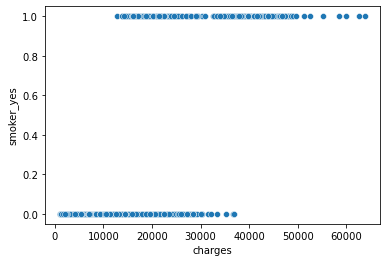

In [10]:
sns.scatterplot(data=temp, x='charges',y='smoker_yes')

In [11]:
def convert_prob_to_label(prob, cutoff = 0.5):
    label = []
    for i in range(len(prob)):
        if prob[i] > cutoff:
            label.append(1)
        else:
            label.append(0)
    return label

Since our data was not normally distributed we used a random forest model. We have a list of all the models that we had analyzed in the start1 file. Finally we found the following model to be the best fit for our data. We split the data into a train and test samples and used the ADASYN sample to do the oversampling. Our model has good f1,percision,sccuracy and recall values with small RMSE. 

Resampled dataset shape Counter({0: 705, 1: 676})
F1: 0.9005847953216374
Acc: 0.9615384615384616
Recall: 0.927710843373494
Precision: 0.875
RMSE: 0.19611613513818404


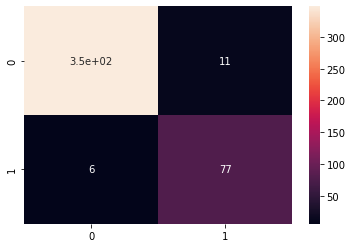

In [83]:
sampler = ADASYN(n_jobs=-1)
#Split Data x/y
y = np.array(temp['smoker_yes']).reshape(-1,1)
x = np.array(temp.drop(columns={"smoker_yes"}))

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33)

#Look at relative imbalance after split
X_trainSamp, y_trainSamp = sampler.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_trainSamp))

#Normalize data
scaler = MinMaxScaler()
#scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_trainSamp)
X_test_norm = scaler.transform(X_test)

#Train model
model = RandomForestClassifier(n_jobs=-1).fit(X_train_norm,y_trainSamp.ravel())
#Make predictions
preds = model.predict(X_test_norm)

#Generate 1/0 results and show results
labels = binarize(np.array(preds).reshape(-1,1), threshold=.5)
conf_matrix = confusion_matrix(y_test,labels)
sns.heatmap(conf_matrix, annot=True)

print("F1:",f1_score(y_test, labels))
print("Acc:",accuracy_score(y_test, labels))
print("Recall:",recall_score(y_test, labels))
print("Precision:",precision_score(y_test, labels))
print("RMSE:", mean_squared_error(preds,y_test,squared=False))
